# ABIDE

/tmp/ipykernel_3169634/321183269.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2)


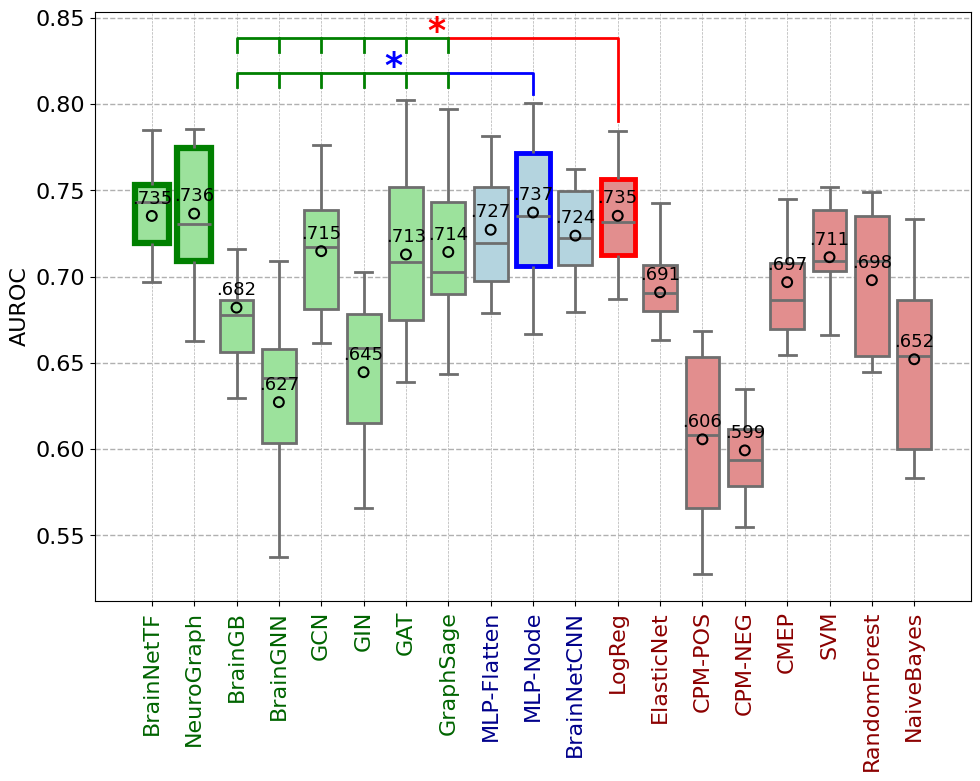

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties
from matplotlib.patches import PathPatch

# Function to set the border color of specific boxes
def set_box_color(bp, model_name, model_order, box_colors):
    """
    This function takes a boxplot object, the model name, model order, 
    and a dictionary of box_colors, and applies the colors to the box borders.
    """
    box_idx = model_order.index(model_name)
    box = bp.artists[box_idx]  # Access the corresponding box
    box.set_edgecolor(box_colors[model_name])
    box.set_linewidth(2)  # You can change the border width here as needed

    

file_path = './ABIDE_overall.txt'
data = {}
current_model = None
model_order = []

with open(file_path, 'r') as file:
    for line in file:
        if line.strip():
            if line.startswith('['):
                current_model = line.strip().strip('[]')
                data[current_model] = {'AUC': [], 'ACC': [], 'SENS': [], 'SPEC': []}
                model_order.append(current_model)
            else:
                parts = line.strip().split(', ')
                auc = float(parts[0].split('=')[1])
                acc = float(parts[1].split('=')[1])
                sens = float(parts[2].split('=')[1])
                spec = float(parts[3].split('=')[1])

                data[current_model]['AUC'].append(auc)
                data[current_model]['ACC'].append(acc)
                data[current_model]['SENS'].append(sens)
                data[current_model]['SPEC'].append(spec)


auc_data = []
acc_data = []
sens_data = []
spec_data = []

for model, results in data.items():
    for auc in results['AUC']:
        auc_data.append([model, auc])
    for acc in results['ACC']:
        acc_data.append([model, acc])
    for sens in results['SENS']:
        sens_data.append([model, sens])
    for spec in results['SPEC']:
        spec_data.append([model, spec])

auc_df = pd.DataFrame(auc_data, columns=['Model', 'AUC'])
acc_df = pd.DataFrame(acc_data, columns=['Model', 'ACC'])
sens_df = pd.DataFrame(sens_data, columns=['Model', 'SENS'])
spec_df = pd.DataFrame(spec_data, columns=['Model', 'SPEC'])



model_order = ['BrainNetTF', 'NeuroGraph', 'BrainGB', 'BrainGNN', 'GCN', 'GIN', 'GAT', 'GraphSage', 
               'MLP-Flatten', 'MLP-Node', 'BrainNetCNN', 'LogReg', 'ElasticNet', 'CPM-POS', 
               'CPM-NEG', 'CMEP', 'SVM', 'RandomForest', 'NaiveBayes']



font_size = 16
plt.rcParams.update({'font.size': 13})


def plot_boxplot_with_means(df, metric, model_order, save_path, width=10, height=8):
    plt.figure(figsize=(width, height))

    split_index_MLP_flatten = model_order.index('MLP-Flatten')
    split_index_LogReg = model_order.index('LogReg')

    palette = ['lightgreen' if i < split_index_MLP_flatten else ('lightblue' if i < split_index_LogReg else 'lightcoral') for i in range(len(model_order))]
    
    ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2)

    means = df.groupby('Model')[metric].mean().reindex(model_order).values
    x_coords = range(len(model_order))
    plt.scatter(x_coords, means, color='none', edgecolor='black', zorder=3, s=50, linewidth=1.5)
    for x, mean in zip(x_coords, means):
        plt.text(x, mean + 0.005, f'{mean:.3f}'.replace('0.', '.'), ha='center', va='bottom', color='black')
    plt.xticks(rotation=90, fontsize=font_size)
    plt.yticks(fontsize=font_size)

    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=1)
    ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)

    
    # MLP-Node
    x1 = 2
    x2 = 9
    y = 0.81
    h=0.008
    plt.plot([x1, x1, x1+5], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+5, x2, x2], [y+h, y+h, 0.806], lw=2, c = 'blue')
    plt.text((x1 + x2) * .5, y + h/2+0.002, "*", color='blue', fontsize=25, fontweight='bold')
    for i in range(1, 6):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')
    

    # LogReg
    x1 = 2
    x2 = 11
    y = 0.83
    h=0.008
    plt.plot([x1, x1, x1+5], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+5, x2, x2], [y+h, y+h, 0.79], lw=2, c = 'red')
    plt.text((x1 + x2) * .5, y + h/2+0.002, "*", color='red', fontsize=25, fontweight='bold')
    for i in range(1, 6):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')


    def highlight_box_and_lines(plot, model_name, linewidth, color):
        model_index = model_order.index(model_name)
        box = plot.patches[model_index]
        box.set_linewidth(linewidth)
        box.set_edgecolor(color)  


    highlight_box_and_lines(ax, 'BrainNetTF', 4.5, 'green')    
    highlight_box_and_lines(ax, 'NeuroGraph', 4.5, 'green')    
    highlight_box_and_lines(ax, 'MLP-Node', 3.5, 'blue') 
    highlight_box_and_lines(ax, 'LogReg', 3.5, 'red')    


    for i, xtick in enumerate(ax.get_xticklabels()):
        if i < split_index_MLP_flatten:
            xtick.set_color('darkgreen')
        elif i < split_index_LogReg:
            xtick.set_color('darkblue')
        else:
            xtick.set_color('darkred')


    ax.set_xlabel('')
    ax.set_ylabel('AUROC', fontsize=font_size)
    

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', format='pdf')
    plt.show()


plot_boxplot_with_means(auc_df, 'AUC', model_order, './ABIDE_boxplot_auc.pdf')


# PNC

/tmp/ipykernel_3169634/1848464997.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2)


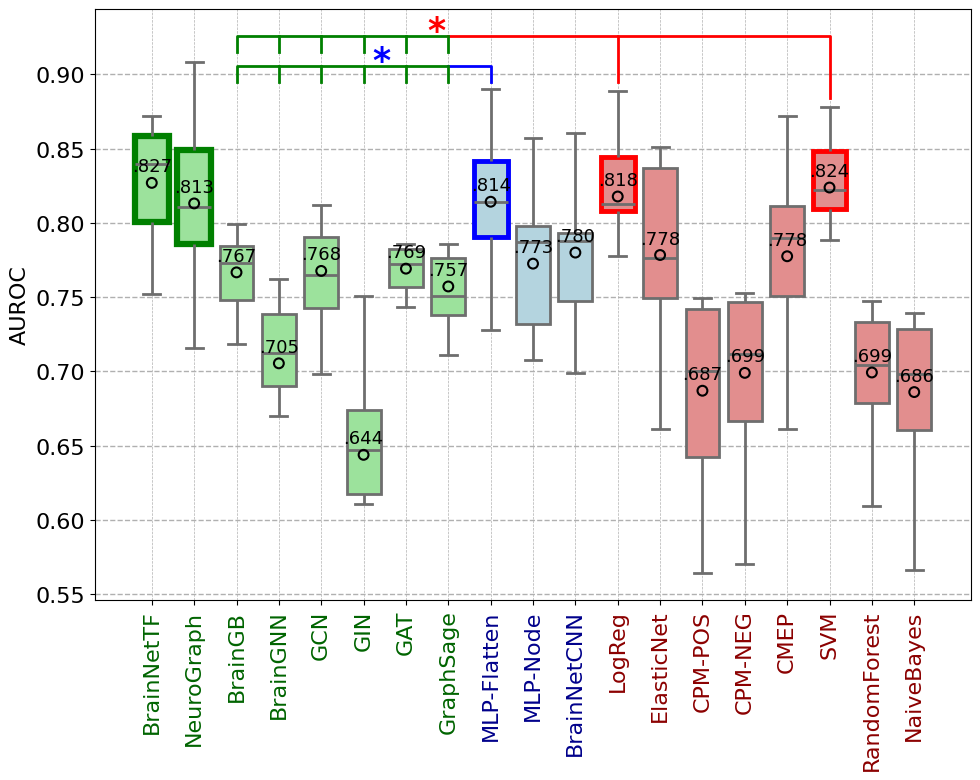

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties
from matplotlib.patches import PathPatch

# Function to set the border color of specific boxes
def set_box_color(bp, model_name, model_order, box_colors):
    """
    This function takes a boxplot object, the model name, model order, 
    and a dictionary of box_colors, and applies the colors to the box borders.
    """
    box_idx = model_order.index(model_name)
    box = bp.artists[box_idx]  # Access the corresponding box
    box.set_edgecolor(box_colors[model_name])
    box.set_linewidth(2)  # You can change the border width here as needed

    

file_path = './PNC_overall.txt'
data = {}
current_model = None
model_order = []

with open(file_path, 'r') as file:
    for line in file:
        if line.strip():
            if line.startswith('['):
                current_model = line.strip().strip('[]')
                data[current_model] = {'AUC': [], 'ACC': [], 'SENS': [], 'SPEC': []}
                model_order.append(current_model)
            else:
                parts = line.strip().split(', ')
                auc = float(parts[0].split('=')[1])
                acc = float(parts[1].split('=')[1])
                sens = float(parts[2].split('=')[1])
                spec = float(parts[3].split('=')[1])

                data[current_model]['AUC'].append(auc)
                data[current_model]['ACC'].append(acc)
                data[current_model]['SENS'].append(sens)
                data[current_model]['SPEC'].append(spec)



auc_data = []
acc_data = []
sens_data = []
spec_data = []

for model, results in data.items():
    for auc in results['AUC']:
        auc_data.append([model, auc])
    for acc in results['ACC']:
        acc_data.append([model, acc])
    for sens in results['SENS']:
        sens_data.append([model, sens])
    for spec in results['SPEC']:
        spec_data.append([model, spec])

auc_df = pd.DataFrame(auc_data, columns=['Model', 'AUC'])
acc_df = pd.DataFrame(acc_data, columns=['Model', 'ACC'])
sens_df = pd.DataFrame(sens_data, columns=['Model', 'SENS'])
spec_df = pd.DataFrame(spec_data, columns=['Model', 'SPEC'])


model_order = ['BrainNetTF', 'NeuroGraph', 'BrainGB', 'BrainGNN', 'GCN', 'GIN', 'GAT', 'GraphSage', 
               'MLP-Flatten', 'MLP-Node', 'BrainNetCNN', 'LogReg', 'ElasticNet', 'CPM-POS', 
               'CPM-NEG', 'CMEP', 'SVM', 'RandomForest', 'NaiveBayes']



font_size = 16
plt.rcParams.update({'font.size': 13})

def plot_boxplot_with_means(df, metric, model_order, save_path, width=10, height=8):
    plt.figure(figsize=(width, height))

    split_index_MLP_flatten = model_order.index('MLP-Flatten')
    split_index_LogReg = model_order.index('LogReg')

    palette = ['lightgreen' if i < split_index_MLP_flatten else ('lightblue' if i < split_index_LogReg else 'lightcoral') for i in range(len(model_order))]
    
    ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2)

    means = df.groupby('Model')[metric].mean().reindex(model_order).values
    x_coords = range(len(model_order))
    plt.scatter(x_coords, means, color='none', edgecolor='black', zorder=3, s=50, linewidth=1.5)
    for x, mean in zip(x_coords, means):
        plt.text(x, mean + 0.005, f'{mean:.3f}'.replace('0.', '.'), ha='center', va='bottom', color='black')
    plt.xticks(rotation=90, fontsize=font_size)
    plt.yticks(fontsize=font_size)

    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=1)
    ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)

    
    # MLP-Node
    x1 = 2
    x2 = 8
    y = 0.895
    h=0.011
    plt.plot([x1, x1, x1+5], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+5, x2, x2], [y+h, y+h, 0.895], lw=2, c = 'blue')
    plt.text((x1 + x2) * .5+0.2, y + h/2+0.002, "*", color='blue', fontsize=25, fontweight='bold')
    for i in range(1, 6):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')
    

    # LogReg
    x1 = 2
    x2 = 11
    y = 0.915
    h=0.011
    plt.plot([x1, x1, x1+5], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+5, x2, x2], [y+h, y+h, 0.895], lw=2, c = 'red')
    plt.text((x1 + x2) * .5, y + h/2+0.002, "*", color='red', fontsize=25, fontweight='bold')
    for i in range(1, 6):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')

    # SVM
    x1 = 11
    x2 = 16
    y = 0.915
    h=0.011
    plt.plot([x1, x2, x2], [y+h, y+h, 0.884], lw=2, c = 'red')



    def highlight_box_and_lines(plot, model_name, linewidth, color):
        model_index = model_order.index(model_name)
        box = plot.patches[model_index]
        box.set_linewidth(linewidth)
        box.set_edgecolor(color) 


    highlight_box_and_lines(ax, 'BrainNetTF', 4.5, 'green')    
    highlight_box_and_lines(ax, 'NeuroGraph', 4.5, 'green')   
    highlight_box_and_lines(ax, 'MLP-Flatten', 3.5, 'blue') 
    highlight_box_and_lines(ax, 'LogReg', 3.5, 'red')    
    highlight_box_and_lines(ax, 'SVM', 3.5, 'red')    


    

    for i, xtick in enumerate(ax.get_xticklabels()):

        if i < split_index_MLP_flatten:
            xtick.set_color('darkgreen')
        elif i < split_index_LogReg:
            xtick.set_color('darkblue')
        else:
            xtick.set_color('darkred')


    ax.set_xlabel('')
    ax.set_ylabel('AUROC', fontsize=font_size)

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', format='pdf')
    plt.show()


plot_boxplot_with_means(auc_df, 'AUC', model_order, './PNC_boxplot_auc.pdf')


# HCP

/tmp/ipykernel_2737278/2322740047.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2.5)


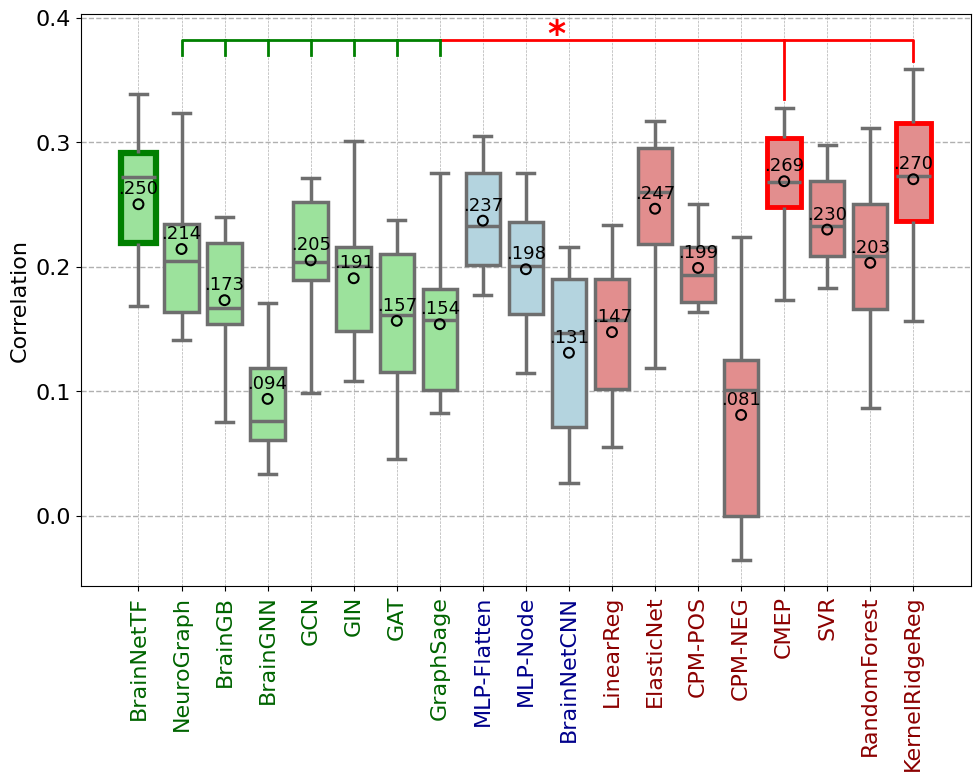

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties



file_path = '/local/scratch3/khan58/BrainNetworkTransformer/testrun/r1_r2_draw/HCP_overall.txt'
data = {}
current_model = None
model_order = []

with open(file_path, 'r') as file:
    for line in file:
        if line.strip():
            if line.startswith('['):
                current_model = line.strip().strip('[]')
                data[current_model] = {'MSE': [], 'MAE': [], 'CORR': []}
                model_order.append(current_model)
            else:
                parts = line.strip().split(', ')
                mse = float(parts[0].split('=')[1])
                mae = float(parts[1].split('=')[1])
                corr = float(parts[2].split('=')[1])

                data[current_model]['MSE'].append(mse)
                data[current_model]['MAE'].append(mae)
                data[current_model]['CORR'].append(corr)                



mse_data = []
mae_data = []
corr_data = []

for model, results in data.items():
    for mse in results['MSE']:
        mse_data.append([model, mse])
    for mae in results['MAE']:
        mae_data.append([model, mae])
    for corr in results['CORR']:
        corr_data.append([model, corr])


mse_df = pd.DataFrame(mse_data, columns=['Model', 'MSE'])
mae_df = pd.DataFrame(mae_data, columns=['Model', 'MAE'])
corr_df = pd.DataFrame(corr_data, columns=['Model', 'CORR'])


font_size = 16
plt.rcParams.update({'font.size': 13})

model_order = ['BrainNetTF', 'NeuroGraph', 'BrainGB', 'BrainGNN', 'GCN', 'GIN', 'GAT', 'GraphSage', 
               'MLP-Flatten', 'MLP-Node', 'BrainNetCNN', 'LinearReg', 'ElasticNet', 'CPM-POS', 
               'CPM-NEG', 'CMEP', 'SVR', 'RandomForest', 'KernelRidgeReg']



def plot_boxplot_with_means(df, metric, model_order, save_path, width=10, height=8):
    plt.figure(figsize=(width, height))

    split_index_MLP_flatten = model_order.index('MLP-Flatten')
    split_index_LinearReg = model_order.index('LinearReg')

    palette = ['lightgreen' if i < split_index_MLP_flatten else ('lightblue' if i < split_index_LinearReg else 'lightcoral') for i in range(len(model_order))]

    ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2.5)
    means = df.groupby('Model')[metric].mean().reindex(model_order).values
    x_coords = range(len(model_order))
    plt.scatter(x_coords, means, color='none', edgecolor='black', zorder=3, s=50, linewidth=1.5)
    for x, mean in zip(x_coords, means):
        plt.text(x, mean + 0.005, f'{mean:.3f}'.replace('0.', '.'), ha='center', va='bottom', color='black')
    plt.xticks(rotation=90, fontsize=font_size)
    plt.yticks(fontsize=font_size)
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=1)
    ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)



    # KernelRidge Regression
    x1 = 1
    x2 = 18
    y = 0.37
    h=0.012
    plt.plot([x1, x1, x1+6], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+6, x2, x2], [y+h, y+h, 0.365], lw=2, c = 'red')
    plt.text((x1 + x2) * .5, y + h/2+0.002, "*", color='red', fontsize=25, fontweight='bold')
    for i in range(1, 7):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')

    # CMEP
    x1 = 15
    plt.plot([x1, x1], [0.335, y+h], lw=2, c = 'red')
    

    


    def highlight_box_and_lines(plot, model_name, linewidth, color):
        model_index = model_order.index(model_name)
        box = plot.patches[model_index]
        box.set_linewidth(linewidth)
        box.set_edgecolor(color)  


    highlight_box_and_lines(ax, 'BrainNetTF', 4.5, 'green')    
    highlight_box_and_lines(ax, 'KernelRidgeReg', 3.5, 'red')
    highlight_box_and_lines(ax, 'CMEP', 3.5, 'red')



    for i, xtick in enumerate(ax.get_xticklabels()):
        if i < split_index_MLP_flatten:
            xtick.set_color('darkgreen')
        elif i < split_index_LinearReg:
            xtick.set_color('darkblue')
        else:
            xtick.set_color('darkred')


    ax.set_xlabel('')

    if metric == 'CORR':
        ax.set_ylabel('Correlation', fontsize=font_size)

    
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', format='pdf')
    plt.show()

plot_boxplot_with_means(corr_df, 'CORR', model_order, './HCP_boxplot_corr.pdf')


# ABCD

/tmp/ipykernel_2737278/2634017856.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2.5)


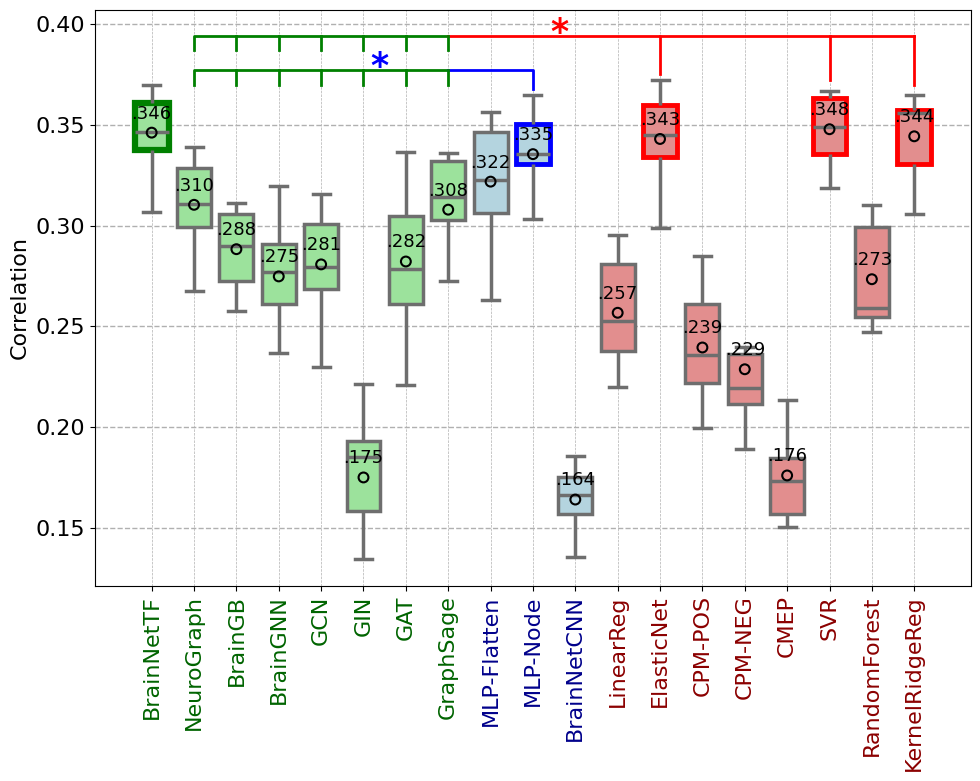

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties



file_path = './ABCD_overall.txt'
data = {}
current_model = None
model_order = []

with open(file_path, 'r') as file:
    for line in file:
        if line.strip():
            if line.startswith('['):
                current_model = line.strip().strip('[]')
                data[current_model] = {'MSE': [], 'MAE': [], 'CORR': []}
                model_order.append(current_model)
            else:
                parts = line.strip().split(', ')
                mse = float(parts[0].split('=')[1])
                mae = float(parts[1].split('=')[1])
                corr = float(parts[2].split('=')[1])

                data[current_model]['MSE'].append(mse)
                data[current_model]['MAE'].append(mae)
                data[current_model]['CORR'].append(corr)                




mse_data = []
mae_data = []
corr_data = []

for model, results in data.items():
    for mse in results['MSE']:
        mse_data.append([model, mse])
    for mae in results['MAE']:
        mae_data.append([model, mae])
    for corr in results['CORR']:
        corr_data.append([model, corr])


mse_df = pd.DataFrame(mse_data, columns=['Model', 'MSE'])
mae_df = pd.DataFrame(mae_data, columns=['Model', 'MAE'])
corr_df = pd.DataFrame(corr_data, columns=['Model', 'CORR'])


font_size = 16
plt.rcParams.update({'font.size': 13})

model_order = ['BrainNetTF', 'NeuroGraph', 'BrainGB', 'BrainGNN', 'GCN', 'GIN', 'GAT', 'GraphSage', 
               'MLP-Flatten', 'MLP-Node', 'BrainNetCNN', 'LinearReg', 'ElasticNet', 'CPM-POS', 
               'CPM-NEG', 'CMEP', 'SVR', 'RandomForest', 'KernelRidgeReg']



def plot_boxplot_with_means(df, metric, model_order, save_path, width=10, height=8):
    plt.figure(figsize=(width, height))

    split_index_MLP_flatten = model_order.index('MLP-Flatten')
    split_index_LinearReg = model_order.index('LinearReg')

    palette = ['lightgreen' if i < split_index_MLP_flatten else ('lightblue' if i < split_index_LinearReg else 'lightcoral') for i in range(len(model_order))]

    ax = sns.boxplot(x='Model', y=metric, data=df, showfliers=False, order=model_order, palette=palette, linewidth=2.5)
    means = df.groupby('Model')[metric].mean().reindex(model_order).values
    x_coords = range(len(model_order))
    plt.scatter(x_coords, means, color='none', edgecolor='black', zorder=3, s=50, linewidth=1.5)
    for x, mean in zip(x_coords, means):
        plt.text(x, mean + 0.005, f'{mean:.3f}'.replace('0.', '.'), ha='center', va='bottom', color='black')
    plt.xticks(rotation=90, fontsize=font_size)
    plt.yticks(fontsize=font_size)
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=1)
    ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)


    # MLP-Node
    x1 = 1
    x2 = 9
    y = 0.37
    h=0.007
    plt.plot([x1, x1, x1+6], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+6, x2, x2], [y+h, y+h, 0.368], lw=2, c = 'blue')
    plt.text((x1 + x2) * .5+0.15, y + h/2, "*", color='blue', fontsize=25, fontweight='bold')
    for i in range(1, 7):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')


    # ElasticNet
    x1 = 1
    x2 = 12
    y = 0.387
    h=0.007
    plt.plot([x1, x1, x1+6], [y, y+h, y+h], lw=2, c = 'green')
    plt.plot([x1+6, x2, x2], [y+h, y+h, 0.375], lw=2, c = 'red')
    plt.text((x1 + 18) * .5-0.1, y + h/2, "*", color='red', fontsize=25, fontweight='bold')
    for i in range(1, 7):
        plt.plot([x1+i, x1+i], [y, y+h], lw=2, c='green')


    # KernelRidge Regression
    x1 = 12
    x2 = 18
    plt.plot([x1, x2], [y+h, y+h], lw=2, c = 'red')
    plt.plot([x2, x2], [y+h, 0.37], lw=2, c = 'red')

    # SVR
    x1 = 16
    plt.plot([x1, x1], [0.372, y+h], lw=2, c = 'red')




    def highlight_box_and_lines(plot, model_name, linewidth, color):
        model_index = model_order.index(model_name)
        box = plot.patches[model_index]
        box.set_linewidth(linewidth)
        box.set_edgecolor(color)  


    highlight_box_and_lines(ax, 'BrainNetTF', 4.5, 'green')    
    highlight_box_and_lines(ax, 'MLP-Node', 3.5, 'blue') 
    highlight_box_and_lines(ax, 'ElasticNet', 3.5, 'red')    
    highlight_box_and_lines(ax, 'KernelRidgeReg', 3.5, 'red')
    highlight_box_and_lines(ax, 'SVR', 3.5, 'red')



    for i, xtick in enumerate(ax.get_xticklabels()):
        if i < split_index_MLP_flatten:
            xtick.set_color('darkgreen')
        elif i < split_index_LinearReg:
            xtick.set_color('darkblue')
        else:
            xtick.set_color('darkred')


    ax.set_xlabel('')

    if metric == 'CORR':
        ax.set_ylabel('Correlation', fontsize=font_size)

    
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', format='pdf')
    plt.show()

plot_boxplot_with_means(corr_df, 'CORR', model_order, './ABCD_boxplot_corr.pdf')
